In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 16:35:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   167W / 260W |   5555MiB / 11019MiB |     96%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_rm_de = db.rm_patent_de
    # db_rm_de = db.rm_patent_de
    # db_rm_de = db.rm_patent_de
    
    # db_rm_de_2017 = db.rm_patent_de_2017
    # db_rm_de_2017 = db.rm_patent_de_2017
    db_rm_de_2017 = db.rm_patent_de_2017
except errors.ConnectionFailure as err:
    print(err)

# 2017

## Company數量

In [6]:
data_assignee = db_rm_de_2017.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [7]:
# 取總數前15家公司
# final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(16)

,company,count
15,Intel Corp,36
16,Intel IP Corp,25
1,Apple Inc,17
20,Robert Bosch GmbH,11
26,Sony Corp,5
22,Samsung Electronics Co Ltd,5
23,Siemens AG,4
7,Fraunhofer Gesellschaft zur Forderung der Ange...,4
14,Innogy Innovation GmbH,3
18,Osram GmbH,3


In [8]:
# com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df = df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df.reset_index(drop=True, inplace=True)

In [9]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))
com_df

,company,count,count_log
0,Intel Corp,36,3.583519
1,Intel IP Corp,25,3.218876
2,Apple Inc,17,2.833213
3,Robert Bosch GmbH,11,2.397895
4,Sony Corp,5,1.609438
5,Samsung Electronics Co Ltd,5,1.609438
6,Siemens AG,4,1.386294
7,Fraunhofer Gesellschaft zur Forderung der Ange...,4,1.386294
8,Innogy Innovation GmbH,3,1.098612
9,Osram GmbH,3,1.098612


In [10]:
com_ls = list(com_df.company)

## Data

In [11]:
ccontry = pd.read_csv("../patent/code/依年分/rm_company_country_de_2017.csv")
ccpc = pd.read_csv("../LDA/company_lda_brief_de_2017.csv")

In [12]:
ccontry[ccontry.company.isin(com_ls)]

,company,AU,BE,BR,CA,CN,DE,DK,EP,ES,...,JP,KR,MX,NO,PL,PT,RU,SG,TW,US
4,Analog Devices Inc,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Apple Inc,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Fisher Rosemount Systems Inc,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
30,Fraunhofer Gesellschaft zur Forderung der Ange...,0.0,0.0,2.0,3.0,3.0,6.0,0.0,2.0,2.0,...,3.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0
34,Fujitsu Ltd,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,Giesecke and Devrient Mobile Security GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Innogy Innovation GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Intel Corp,0.0,0.0,0.0,0.0,19.0,49.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,24.0
49,Intel IP Corp,0.0,0.0,0.0,0.0,6.0,50.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0
58,Messer Group GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Similarity計算

### Country

- 換成機率  

In [13]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

### PBC
- 和Samsung Electronics Co Ltd比較

In [14]:
ccontry_pbc = ccontry2.loc[com_ls,:].copy()
ccontry_pbc.head()

,AU,BE,BR,CA,CN,DE,DK,EP,ES,FR,...,JP,KR,MX,NO,PL,PT,RU,SG,TW,US
company,,,,,,,,,,,,,,,,,,,,,
Intel Corp,0.0,0.0,0.0,0.0,0.190000,0.490000,0.0,0.010000,0.0,0.0,...,0.010000,0.030000,0.0,0.0,0.0,0.0,0.0,0.020000,0.01,0.240000
Intel IP Corp,0.0,0.0,0.0,0.0,0.088235,0.735294,0.0,0.000000,0.0,0.0,...,0.000000,0.029412,0.0,0.0,0.0,0.0,0.0,0.029412,0.00,0.117647
Apple Inc,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000
Robert Bosch GmbH,0.0,0.0,0.0,0.0,0.000000,0.785714,0.0,0.214286,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000
Sony Corp,0.0,0.0,0.0,0.0,0.117647,0.294118,0.0,0.176471,0.0,0.0,...,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.294118


In [15]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### CPC

In [16]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [17]:
ccpc_pbc = ccpc2.loc[com_ls,:].copy()
# ccpc_pbc

In [18]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

## Scatter Plot

In [19]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

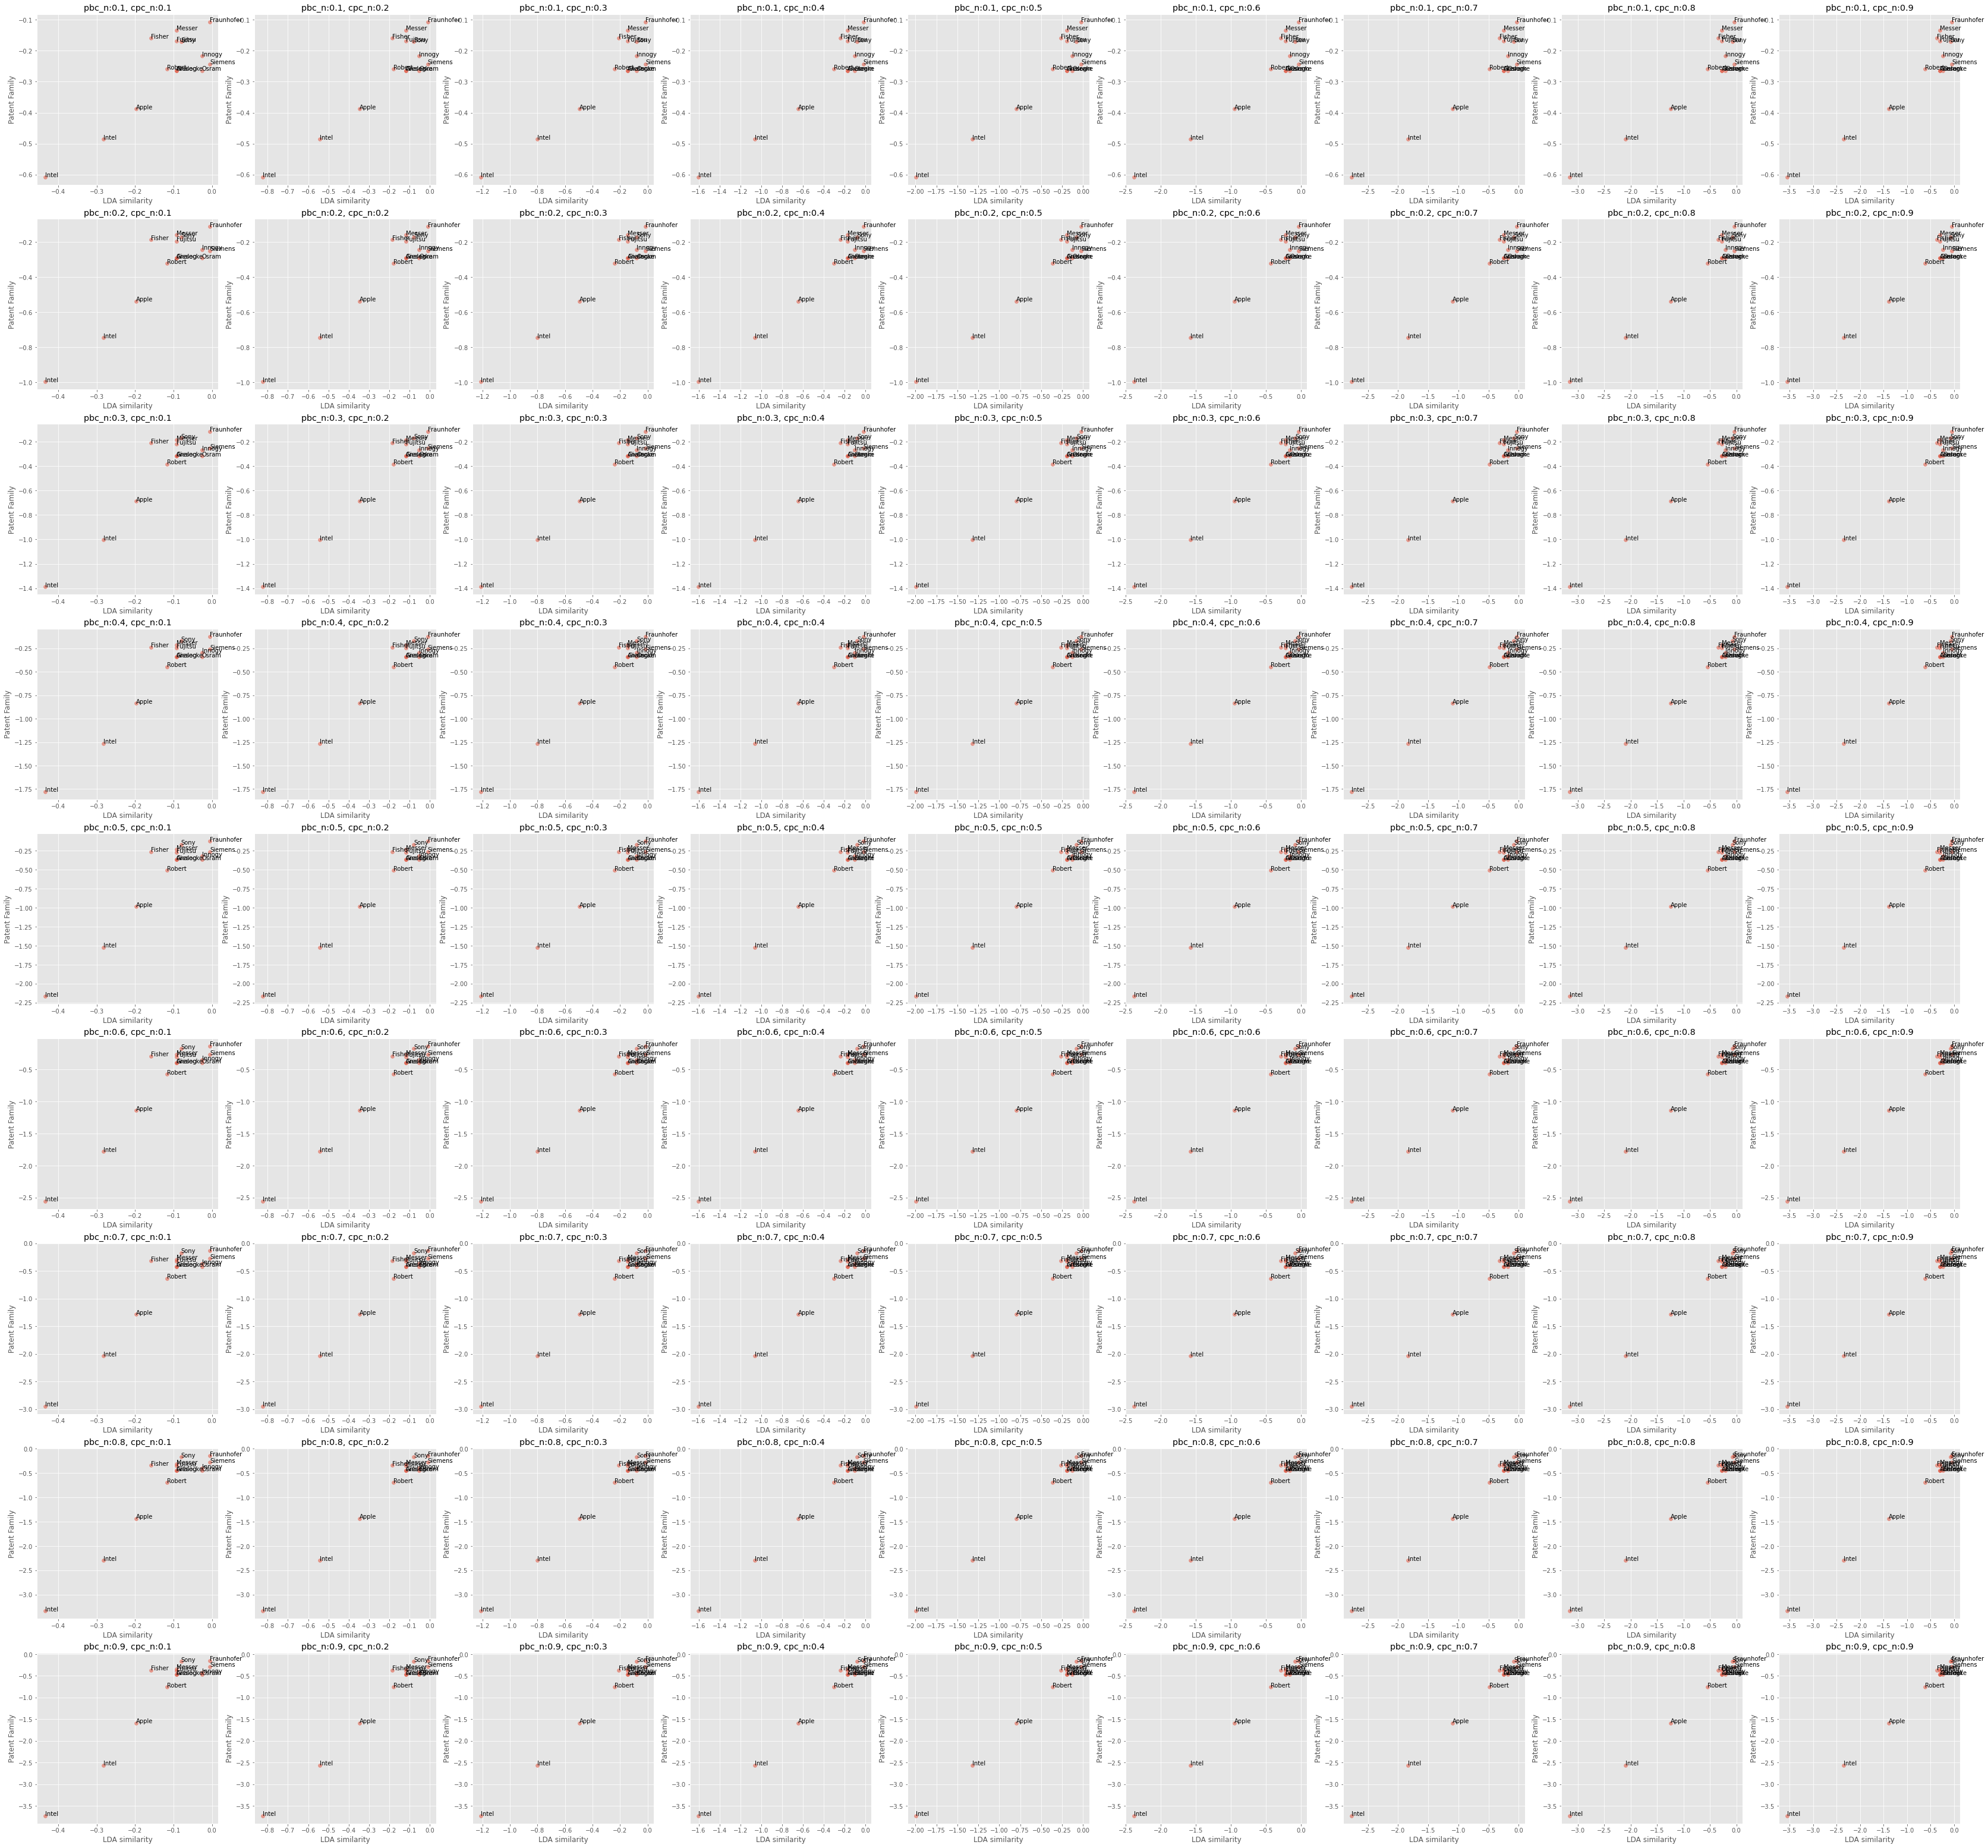

In [20]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_brief_2017_1.png'.format(pbc_n))

In [21]:
c_df

,cpc,country
company,,
Intel Corp,3.551741,3.725392
Intel IP Corp,2.355261,2.558152
Apple Inc,1.394922,1.585959
Robert Bosch GmbH,0.614044,0.756777
Sony Corp,0.080000,0.170868
Siemens AG,0.044814,0.282909
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.044814,0.146487
Innogy Innovation GmbH,0.234849,0.425325
Osram GmbH,0.234849,0.472944


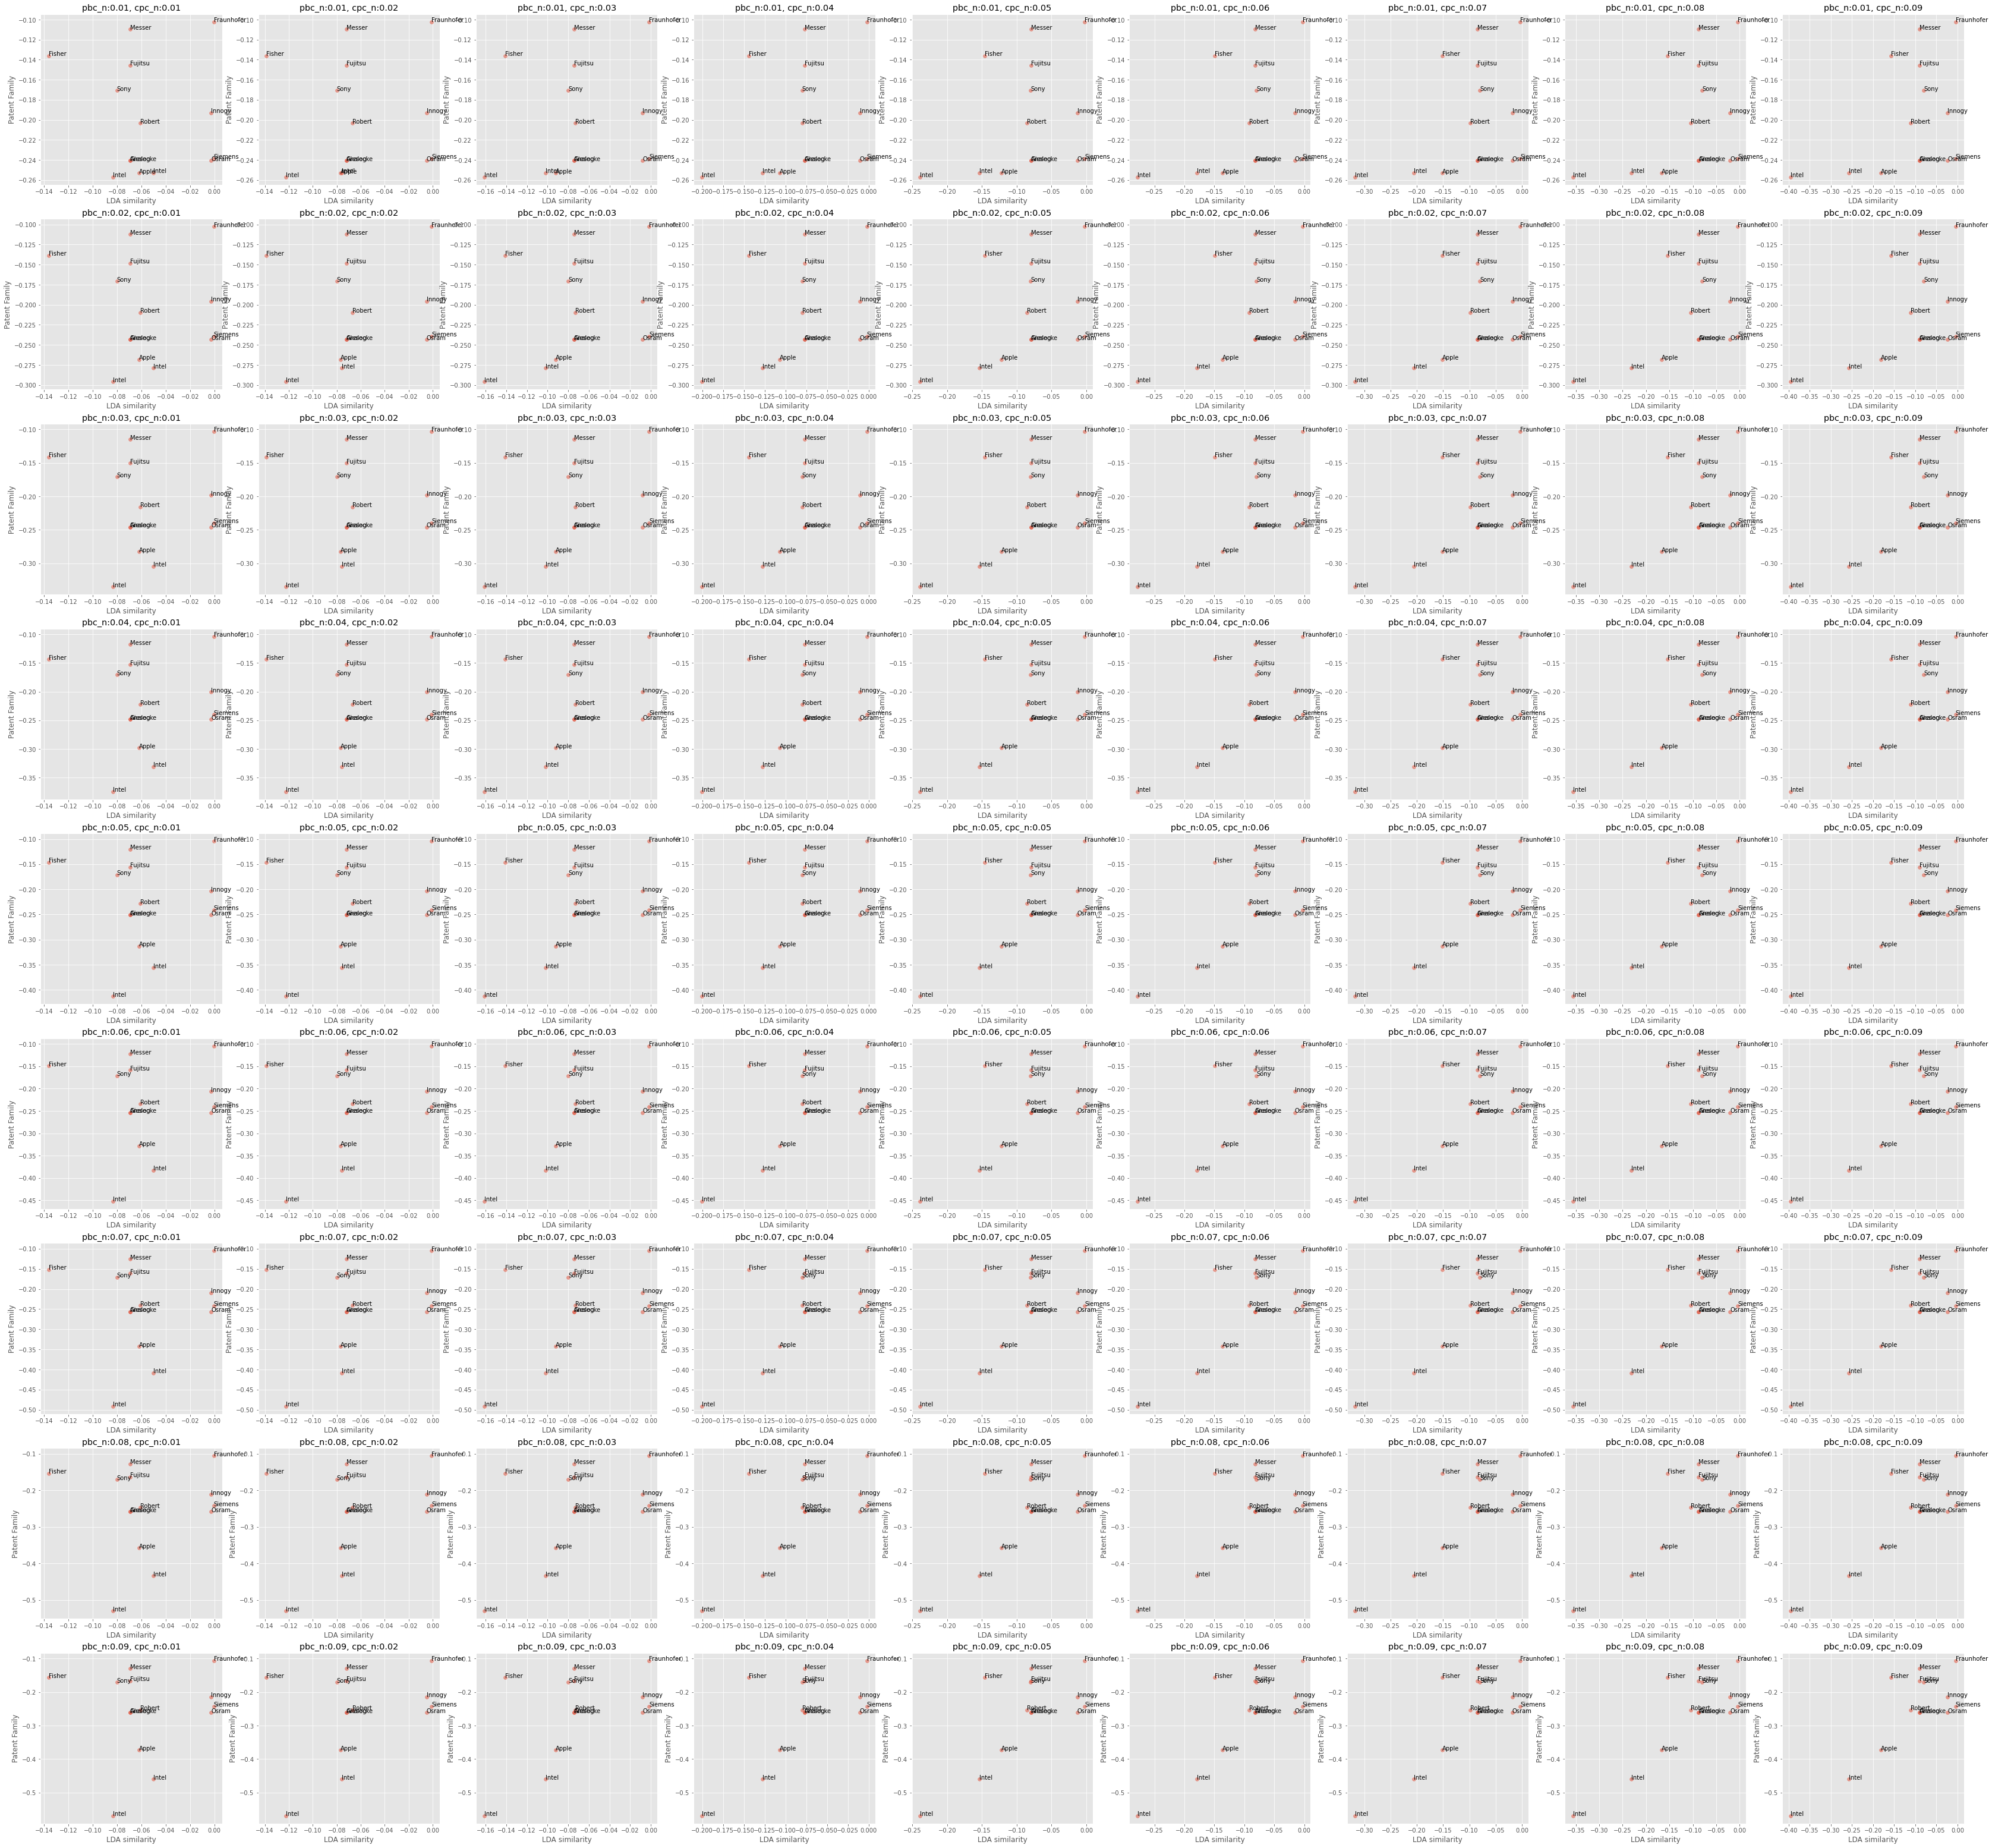

In [22]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("LDA similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_brief_2017_2.png'.format(pbc_n))

In [23]:
c_df

,cpc,country
company,,
Intel Corp,0.395174,0.568825
Intel IP Corp,0.257126,0.460017
Apple Inc,0.181845,0.372882
Robert Bosch GmbH,0.110495,0.253229
Sony Corp,0.080000,0.170868
Siemens AG,0.004481,0.242577
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.004481,0.106154
Innogy Innovation GmbH,0.023485,0.213961
Osram GmbH,0.023485,0.261580


In [24]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_deA")\
                                                    .replace("Taiwan Semiconductor Manufacturing Co TSMC","TSMC")\
                                                    .replace("Suzhou Jiang Zuomen Network Technology","Suzhou_JZ")\
                                                    .replace("Suzhou Jiang Zuomen Network Tech","Suzhou_JZ_net")\
                                                    .replace("Sony Group","Sony_Group")\
                                                    .replace("Sony Semiconductor Solutions","Sony_Semiconductor")\
                                                    .replace("Siemens Energy Global GmbH and Co KG","Siemens_Energy")\
                                                    .replace("Siemens Mobility GmbH","Siemens_Mobility")\
                                                    .replace("Bayerische Motoren Werke AG","BMW")\
                                                    .replace("Friedrich Alexander Univeritaet Erlangen Nuernberg FAU","FAU")\
                                                    .replace("Intel IP","Intel_IP"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

In [25]:
c_df

,cpc,country
company,,
Intel,0.395174,0.568825
Intel_IP,0.257126,0.460017
Apple,0.181845,0.372882
Robert Bosch GmbH,0.110495,0.253229
Sony,0.080000,0.170868
Siemens AG,0.004481,0.242577
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.004481,0.106154
Innogy Innovation GmbH,0.023485,0.213961
Osram GmbH,0.023485,0.261580


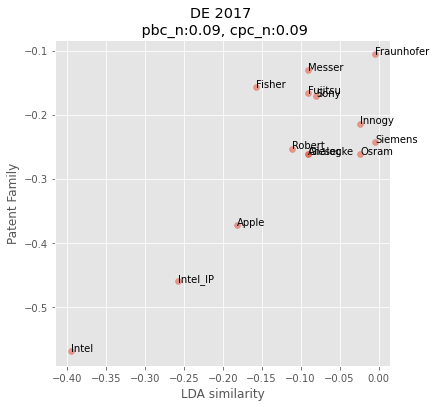

In [26]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("DE 2017 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("LDA similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [27]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [28]:
competitor_ls

[4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [29]:
c_df

,cpc,country
company,,
Intel,0.395174,0.568825
Intel_IP,0.257126,0.460017
Apple,0.181845,0.372882
Robert Bosch GmbH,0.110495,0.253229
Sony,0.080000,0.170868
Siemens AG,0.004481,0.242577
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.004481,0.106154
Innogy Innovation GmbH,0.023485,0.213961
Osram GmbH,0.023485,0.261580


In [30]:
c_df.to_csv("competitor_df/company/lda_de_2017.csv")